# Amazon Alexa Reviews

En este notebook se busca predecir comentarios positivos o negativos respecto al producto Amazon Alexa

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('amazon_alexa.tsv', delimiter = '\t', quoting = 3)

In [3]:
df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"""Perfect for kids, adults and everyone in betw...",1
3146,5,30-Jul-18,Black Dot,"""Listening to music, searching locations, chec...",1
3147,5,30-Jul-18,Black Dot,"""I do love these things, i have them running m...",1
3148,5,30-Jul-18,White Dot,"""Only complaint I have is that the sound quali...",1


## Exploración de datos

In [4]:
print(df.rating.unique())
#Se muestran algunos de los peores comentarios
df[df.rating==1]

[5 4 3 2 1]


,rating,date,variation,verified_reviews,feedback
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0
162,1,30-Jul-18,Sandstone Fabric,"""Stopped working after 2 weeks ,didn't follow ...",0
341,1,28-Jul-18,Charcoal Fabric,Alexa hardly came on..,0
350,1,31-Jul-18,Black,Item no longer works after just 5 months of us...,0
361,1,29-Jul-18,Black,This thing barely works. You have to select 3r...,0
...,...,...,...,...,...
3024,1,30-Jul-18,Black Dot,"""I was really happy with my original echo so i...",0
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0
3091,1,30-Jul-18,Black Dot,I didn’t order it,0


In [5]:
#Se muestran algunos de los mejores comentarios

In [6]:
df[df.rating==5]

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1
5,5,31-Jul-18,Heather Gray Fabric,"""I received the echo as a gift. I needed anoth...",1
...,...,...,...,...,...
3144,5,30-Jul-18,Black Dot,love it,1
3145,5,30-Jul-18,Black Dot,"""Perfect for kids, adults and everyone in betw...",1
3146,5,30-Jul-18,Black Dot,"""Listening to music, searching locations, chec...",1
3147,5,30-Jul-18,Black Dot,"""I do love these things, i have them running m...",1


In [7]:
df[(df.rating==3) & (df.feedback==1)]

,rating,date,variation,verified_reviews,feedback
6,3,31-Jul-18,Sandstone Fabric,"""Without having a cellphone, I cannot use many...",1
24,3,30-Jul-18,Sandstone Fabric,"""I got a second unit for the bedroom, I was ex...",1
33,3,30-Jul-18,Heather Gray Fabric,The speakers sound pretty good for being so sm...,1
49,3,30-Jul-18,Charcoal Fabric,No different than Apple. To play a specific li...,1
54,3,30-Jul-18,Sandstone Fabric,like google better,1
...,...,...,...,...,...
3059,3,30-Jul-18,White Dot,Works well. Just disappointed with the speaker...,1
3068,3,30-Jul-18,White Dot,I was hoping the cord was white also. Otherwis...,1
3114,3,30-Jul-18,Black Dot,,1
3122,3,30-Jul-18,Black Dot,I dislike that it confuses my requests all the...,1


In [8]:
df[(df.rating==3) & (df.feedback==0)]

,rating,date,variation,verified_reviews,feedback


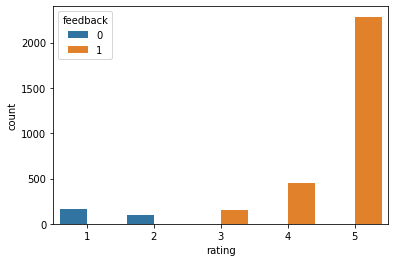

In [9]:
sns.countplot(df.rating, data=df, hue="feedback")

Como se ve, los comentarios con rating 1 y 2 son clasificados como negativos y el resto positivos. Tambíen se ve que el dataset está muy desbalanceado para el lado de los positivos.

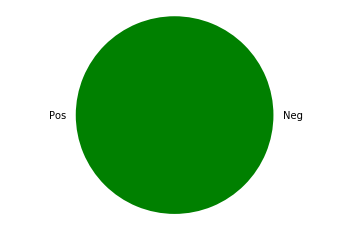

In [10]:
plt.pie(x=df.feedback.unique(), labels=["Pos", "Neg"], colors=["Green", "Red"])
plt.axis("equal")
plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
rating              3150 non-null int64
date                3150 non-null object
variation           3150 non-null object
verified_reviews    3150 non-null object
feedback            3150 non-null int64
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


No hay valores nulos

In [12]:
#Analizo el largo de los comentarios

largo=[]
for i in df.verified_reviews:
    largo.append(len(i))

df["largo"]=largo

In [13]:
df.head()

,rating,date,variation,verified_reviews,feedback,largo
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [14]:
df.sort_values("largo", ascending=False)

,rating,date,variation,verified_reviews,feedback,largo
2016,5,20-Jul-18,Black Plus,"""Incredible piece of technology.I have this ri...",1,2853
1322,5,21-Jul-18,Black Spot,"""I got this on Prime day and figured I'd see w...",1,2395
563,3,12-Jun-18,Black,"""I received my Echo Dot today in good conditio...",1,1956
1383,3,17-Jul-18,Black Spot,"""This is 1 of 6 echo devices in the house and ...",1,1835
1996,2,21-Jul-18,Black Plus,"""I have been thinking about getting this for a...",0,1688
...,...,...,...,...,...,...
2918,3,30-Jul-18,White Dot,,1,1
1728,5,28-Jul-18,Black Show,,1,1
1761,5,30-Jul-18,Black Plus,,1,1
1764,2,30-Jul-18,Black Plus,,0,1


In [15]:
df.sort_values("largo", ascending=False).head(20)

,rating,date,variation,verified_reviews,feedback,largo
2016,5,20-Jul-18,Black Plus,"""Incredible piece of technology.I have this ri...",1,2853
1322,5,21-Jul-18,Black Spot,"""I got this on Prime day and figured I'd see w...",1,2395
563,3,12-Jun-18,Black,"""I received my Echo Dot today in good conditio...",1,1956
1383,3,17-Jul-18,Black Spot,"""This is 1 of 6 echo devices in the house and ...",1,1835
1996,2,21-Jul-18,Black Plus,"""I have been thinking about getting this for a...",0,1688
2234,5,30-Jul-18,Configuration: Fire TV Stick,"""Recently cut the cord on cable television. Ne...",1,1566
1828,4,28-Jul-18,Black Plus,"""I love everything about it. I love that the e...",1,1362
2004,4,20-Jul-18,Black Plus,"""I got it to try side by side with the Echo or...",1,1332
1605,5,29-Jul-18,Black Show,"""I haven't had my show very long or used it a ...",1,1313
1986,3,23-Jul-18,Black Plus,"""We are a long time Amazon Prime family, many ...",1,1311


Se ve que los comentarios más largos corresponden principalmente a comentarios positivos

In [16]:
df.largo.unique()

array([  13,    9,  197,  174,    5,  367,  221,   11,  116,   65,  169,
        292,   20,   24,   27,   67,  216,   86,  453,  246,  387,   58,
        181,   15,  154,   25,  135,   23,   74,  185,  308,  310,  150,
         42,   80,  485,   95,  170,   14,   84,  138,  165,   18,  208,
         48,  120,  108,   78,   73,   31,   39,    1,  100,   41,  187,
         26,   37,  168,   66,   54,   10,   12,  708,   52,   29,  243,
         43,  111,   32,  129,  155,   30,   21,  592,   55,   60,  270,
          8,   68,  218,   94,  275,   62,  163,  315,   59,   38,   53,
        273,  127,  149,  331,   77,   36,   51,   46,  232,   83,   61,
         75,  173,  361,  306,    7,  591,    4,  211,  213,  109,   96,
        286,   79,  256,  524,  880,  106,   89,  409,   50,  175,   45,
        128,  121,   17,   90,  238,  469,  340,  568,   19,  667,   69,
        114,   16,  247,  123,  441,   99,   56,  283,   33,   35,  122,
         22,  605,  464,  309,  131,  276,  157,  1

In [17]:
#Elimino las filas de reviews con menos de 5 caracteres.
df=df[df.largo>5]

In [18]:
df

,rating,date,variation,verified_reviews,feedback,largo
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
5,5,31-Jul-18,Heather Gray Fabric,"""I received the echo as a gift. I needed anoth...",1,174
...,...,...,...,...,...,...
3144,5,30-Jul-18,Black Dot,love it,1,7
3145,5,30-Jul-18,Black Dot,"""Perfect for kids, adults and everyone in betw...",1,52
3146,5,30-Jul-18,Black Dot,"""Listening to music, searching locations, chec...",1,137
3147,5,30-Jul-18,Black Dot,"""I do love these things, i have them running m...",1,443


## Preprocesamiento

In [19]:
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

#Función POS
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)


In [20]:
#Stopwords
stopwords = nltk.corpus.stopwords.words('english')

In [21]:
#Normalizo los datos

reviews_list=[]
for review in df.verified_reviews:
    # Reemplazo los caracteres que no sean letras por espacios
    review=re.sub("[^a-zA-Z]"," ",str(review))
    
    # Paso todo a minúsculas
    review=review.lower()
    
    # Tokenizo para separar las palabras
    review=nltk.word_tokenize(review)
    
    # Saco las Stopwords
    review = [palabra for palabra in review if not palabra in stopwords]
       
    # Aplico el Lemmatizer
    wordnet_lemmatizer=WordNetLemmatizer()
    review = [wordnet_lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in review]
    
    # Por ultimo vuelvo a unir el review
    review=" ".join(review)
    reviews_list.append(review)

In [22]:
#Genero una columa con los comentarios tokenizados y lemmatizados
df["reviews_normalizadas"]= reviews_list
df.dropna(axis=0, inplace=True)

df

,rating,date,variation,verified_reviews,feedback,largo,reviews_normalizadas
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,love echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,love
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197,sometimes play game answer question correctly ...
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174,lot fun thing yr old learns dinosaur control l...
5,5,31-Jul-18,Heather Gray Fabric,"""I received the echo as a gift. I needed anoth...",1,174,receive echo gift need another bluetooth somet...
...,...,...,...,...,...,...,...
3144,5,30-Jul-18,Black Dot,love it,1,7,love
3145,5,30-Jul-18,Black Dot,"""Perfect for kids, adults and everyone in betw...",1,52,perfect kid adult everyone
3146,5,30-Jul-18,Black Dot,"""Listening to music, searching locations, chec...",1,137,listen music search location check time look w...
3147,5,30-Jul-18,Black Dot,"""I do love these things, i have them running m...",1,443,love thing run entire home tv light thermostat...


In [23]:
# Me quedo con las columnas que me interesan
df_final=df.drop(labels=["date","variation","verified_reviews","largo"],axis=1)
df_final.to_csv("amazon_alexa_final.csv")

In [24]:
df_final=pd.read_csv("amazon_alexa_final.csv")
df_final.head()

,Unnamed: 0,rating,feedback,reviews_normalizadas
0,0,5,1,love echo
1,1,5,1,love
2,2,4,1,sometimes play game answer question correctly ...
3,3,5,1,lot fun thing yr old learns dinosaur control l...
4,5,5,1,receive echo gift need another bluetooth somet...


In [25]:
df_final.drop(labels="Unnamed: 0", axis=1, inplace=True)

In [26]:
df_final

,rating,feedback,reviews_normalizadas
0,5,1,love echo
1,5,1,love
2,4,1,sometimes play game answer question correctly ...
3,5,1,lot fun thing yr old learns dinosaur control l...
4,5,1,receive echo gift need another bluetooth somet...
...,...,...,...
3025,5,1,love
3026,5,1,perfect kid adult everyone
3027,5,1,listen music search location check time look w...
3028,5,1,love thing run entire home tv light thermostat...


In [27]:
#Vectorización
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf=TfidfVectorizer(ngram_range=(1,2))

## Modelado

Voy a probar DecisionTreeClassifier, Sequential y XGBoost. Utilizaremos GridSearchCV. Como métricas usaré  AUC ROC, Accuracy, ConfusionMatrix.

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report

In [29]:
#Preparo conjunto train-test
from sklearn.model_selection import train_test_split
X=df_final.reviews_normalizadas
y=df_final.feedback

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state = 12)

#Vectorizo los datos
X_train = tf_idf.fit_transform(X_train).toarray()
X_test = tf_idf.transform(X_test).toarray()
y_train = np.array(y_train)
y_test = np.array(y_test)

In [30]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2272, 19475)
(2272,)
(758, 19475)
(758,)


In [31]:
# Vizualizamos las 100 palabras mas usadas
all_words = tf_idf.get_feature_names()
print("100 palabras mas usadas: ",all_words[0:100])

100 palabras mas usadas:  ['abay', 'abay monitor', 'abc', 'abc day', 'abd', 'abd start', 'ability', 'ability contact', 'ability control', 'ability create', 'ability example', 'ability fall', 'ability get', 'ability listen', 'ability multiple', 'ability night', 'ability play', 'ability talk', 'able', 'able access', 'able accomplish', 'able add', 'able alexa', 'able answer', 'able buy', 'able connect', 'able contact', 'able control', 'able download', 'able explore', 'able find', 'able follow', 'able hear', 'able hook', 'able install', 'able interpret', 'able link', 'able listen', 'able make', 'able manage', 'able open', 'able play', 'able put', 'able read', 'able see', 'able self', 'able set', 'able shout', 'able start', 'able sync', 'able talk', 'able tell', 'able turn', 'able use', 'able voice', 'able watch', 'abode', 'abode home', 'absolutely', 'absolutely amaze', 'absolutely everything', 'absolutely great', 'absolutely love', 'absolutely response', 'absolutly', 'absolutly love', 'ac'

In [32]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
y_train

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

### DecisionTreeClassifier

In [34]:
from sklearn.tree import DecisionTreeClassifier

estimator = DecisionTreeClassifier(random_state=12)
param_grid={"max_depth":[5,10,15]}

dtc=GridSearchCV(estimator, param_grid, cv=5, return_train_score=True)

In [35]:
#Entreno
dtc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=12,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': [5, 10, 15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=Non

In [36]:
pd.DataFrame(dtc.cv_results_).sort_values(by='mean_test_score',ascending=False)[['params','rank_test_score','mean_test_score','mean_train_score']]

,params,rank_test_score,mean_test_score,mean_train_score
0,{'max_depth': 5},1,0.927817,0.944872
1,{'max_depth': 10},2,0.924736,0.955986
2,{'max_depth': 15},2,0.924736,0.964019


In [37]:
#Obtengo el mejor estimador
dtc=dtc.best_estimator_

In [38]:
#Hago la predicción
y_pred_dtc=dtc.predict(X_test)

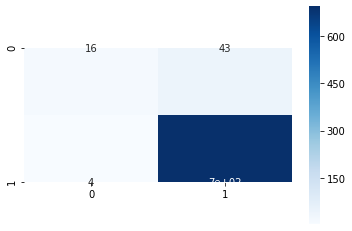

In [39]:
#Dibujo la matriz de confusión
sns.heatmap(confusion_matrix(y_test,y_pred_dtc), annot=True, cmap="Blues", square=True)

In [40]:
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.80      0.27      0.41        59
           1       0.94      0.99      0.97       699

    accuracy                           0.94       758
   macro avg       0.87      0.63      0.69       758
weighted avg       0.93      0.94      0.92       758



In [41]:
print(roc_auc_score(y_test, y_pred_dtc))
print(accuracy_score(y_test, y_pred_dtc))

0.6327319900099415
0.9379947229551451


### Sequential

In [42]:
import keras
from keras.models import Sequential
from keras.layers import Dense

seq = Sequential()
seq.add(Dense(6, activation='relu'))
seq.add(Dense(9, activation='relu'))
seq.add(Dense(9, activation='relu'))
seq.add(Dense(9, activation='relu'))
seq.add(Dense(9, activation='relu'))
seq.add(Dense(1, activation='softmax'))

optimizer = keras.optimizers.Adam()
seq.compile(optimizer=optimizer, loss='binary_crossentropy',metrics=['accuracy'])

Using TensorFlow backend.


In [43]:
seq.fit(X_train, y_train, epochs=20, validation_split=0.25)

Train on 1704 samples, validate on 568 samples
Epoch 1/20
1704/1704 [==============================] - 3s 2ms/step - loss: 1.2328 - accuracy: 0.9196 - val_loss: 1.0798 - val_accuracy: 0.9296
Epoch 2/20
1704/1704 [==============================] - 1s 429us/step - loss: 1.2328 - accuracy: 0.9196 - val_loss: 1.0798 - val_accuracy: 0.9296
Epoch 3/20
1704/1704 [==============================] - 1s 430us/step - loss: 1.2328 - accuracy: 0.9196 - val_loss: 1.0798 - val_accuracy: 0.9296
Epoch 4/20
1704/1704 [==============================] - 1s 432us/step - loss: 1.2328 - accuracy: 0.9196 - val_loss: 1.0798 - val_accuracy: 0.9296
Epoch 5/20
1704/1704 [==============================] - 1s 432us/step - loss: 1.2328 - accuracy: 0.9196 - val_loss: 1.0798 - val_accuracy: 0.9296
Epoch 6/20
1704/1704 [==============================] - 1s 443us/step - loss: 1.2328 - accuracy: 0.9196 - val_loss: 1.0798 - val_accuracy: 0.9296
Epoch 7/20
1704/1704 [==============================] - 1s 452us/step - loss: 1

In [44]:
y_pred_seq=seq.predict(X_test)

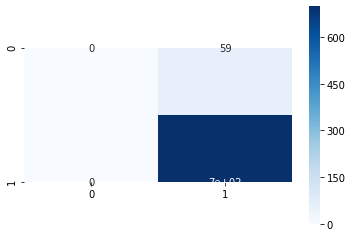

In [45]:
sns.heatmap(confusion_matrix(y_test,y_pred_seq), annot=True, cmap="Blues", square=True)

In [46]:
print(classification_report(y_test, y_pred_seq))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        59
           1       0.92      1.00      0.96       699

    accuracy                           0.92       758
   macro avg       0.46      0.50      0.48       758
weighted avg       0.85      0.92      0.88       758



In [47]:
print("Roc Score:", roc_auc_score(y_test, y_pred_seq))
print("Accuracy Socre:",accuracy_score(y_test, y_pred_seq))

Roc Score: 0.5
Accuracy Socre: 0.9221635883905013


## XGBoost

In [48]:
from xgboost import XGBClassifier

xgb= XGBClassifier(random_state=12)

In [49]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=12, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [50]:
y_pred_xgb=xgb.predict(X_test)

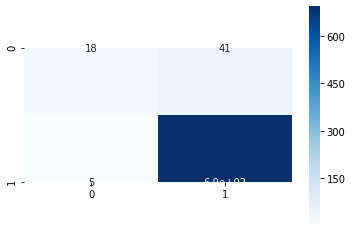

In [51]:
sns.heatmap(confusion_matrix(y_test,y_pred_xgb), annot=True, cmap="Blues", square=True)

In [52]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.78      0.31      0.44        59
           1       0.94      0.99      0.97       699

    accuracy                           0.94       758
   macro avg       0.86      0.65      0.70       758
weighted avg       0.93      0.94      0.93       758



In [53]:
print("Roc Score:", roc_auc_score(y_test, y_pred_xgb))
print("Accuracy Socre:", accuracy_score(y_test, y_pred_xgb))

Roc Score: 0.648965834970054
Accuracy Socre: 0.9393139841688655


## Comparación entre modelos

In [54]:
modelos=["Arbol de decisión","Red neuronal","XGBoost"]
roc_scores=[roc_auc_score(y_test, y_pred_dtc), roc_auc_score(y_test, y_pred_seq), roc_auc_score(y_test, y_pred_xgb)]
acc_scores=[accuracy_score(y_test, y_pred_dtc), accuracy_score(y_test, y_pred_seq), accuracy_score(y_test, y_pred_xgb)]

---------------ROC_AUC---------------------------
Arbol de decisión: 0.6327319900099415
Red neuronal: 0.5
XGBoost: 0.648965834970054


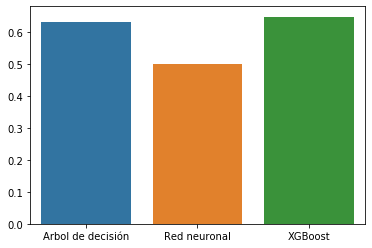

In [55]:
print("---------------ROC_AUC---------------------------")
print("Arbol de decisión:",roc_auc_score(y_test, y_pred_dtc))
print("Red neuronal:",roc_auc_score(y_test, y_pred_seq))
print("XGBoost:",roc_auc_score(y_test, y_pred_xgb))
sns.barplot(x=modelos, y=roc_scores, )

---------------Accuracy---------------------------
Arbol de decisión: 0.9379947229551451
Red neuronal: 0.9221635883905013
XGBoost: 0.9393139841688655


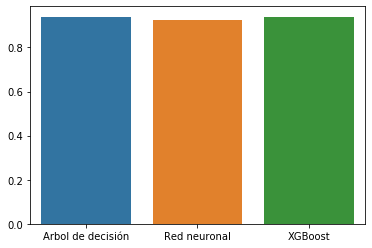

In [56]:
print("---------------Accuracy---------------------------")
print("Arbol de decisión:",accuracy_score(y_test, y_pred_dtc))
print("Red neuronal:",accuracy_score(y_test, y_pred_seq))
print("XGBoost:",accuracy_score(y_test, y_pred_xgb))
sns.barplot(x=modelos, y=acc_scores, )